# Tutorial to View Spectra

In [171]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt

In [174]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)
#os.chdir(workbookDir)  # If you changed the current working dir, this will take you back to the workbook dir.

workbookDir: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/notebooks


In [175]:
import sys
sys.path.append(workbookDir)
sys.path.append(os.path.dirname(workbookDir))

In [176]:
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.logbook import LogBook
from spectractor.extractor.dispersers import *
from spectractor.extractor.spectrum import *

# Configuration

In [177]:
parameters.VERBOSE = True
parameters.DEBUG = True

In [178]:
#thedate="20190214"
thedate="20190215"

In [179]:
output_directory="../output/"+thedate

In [180]:
parameters.VERBOSE=True 
parameters.DISPLAY=True

# Input Files for Spectra

## Get list of files

In [181]:
onlyfiles = [f for f in listdir(output_directory) if isfile(join(output_directory, f))]

In [182]:
onlyfiles=np.array(onlyfiles)

## Sort files

In [183]:
sortedindexes=np.argsort(onlyfiles)

In [184]:
onlyfiles=onlyfiles[sortedindexes]

In [185]:
onlyfiles

array(['T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot_spectrogram.fits',
       'T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot_spectrum.fits',
       'T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot_table.csv',
       'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_rot_spectrogram.fits',
       'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_rot_spectrum.fits',
       'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_rot_table.csv',
       'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_spectrogram.fits',
       'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_spectrum.fits',
       'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_table.csv',
       'T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_rot_spectrogram.fits',
       'T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_rot_spectrum.fits',
       'T1M_20190215_225736_562_HD116405_Filtre_None_b

## Extract \_spectrum.fits file

In [186]:
onlyfilesspectrum=[]
for f in onlyfiles:
    if re.search("^T.*_spectrum.fits$",f):
        onlyfilesspectrum.append(re.findall("(^T.*_spectrum.fits$)",f)[0])

In [187]:
onlyfilesspectrum=np.array(onlyfilesspectrum)
sortedindexes=np.argsort(onlyfilesspectrum)
onlyfilesspectrum=onlyfilesspectrum[sortedindexes]

### Extract basename of files

In [188]:
onlyfilesbasename=[]
for f in onlyfilesspectrum:
    onlyfilesbasename.append(re.findall("(^T.*)_spectrum.fits$",f)[0])

In [189]:
 onlyfilesbasename

['T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot',
 'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_rot',
 'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot',
 'T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_rot',
 'T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot',
 'T1M_20190215_225847_115_HD116405_Filtre_None_bin1x1.6_red_rot',
 'T1M_20190215_225922_399_HD116405_Filtre_None_bin1x1.7_red_rot',
 'T1M_20190215_225957_677_HD116405_Filtre_None_bin1x1.8_red_rot',
 'T1M_20190215_230032_956_HD116405_Filtre_None_bin1x1.9_red_rot',
 'T1M_20190215_230108_233_HD116405_Filtre_None_bin1x1.10_red_rot',
 'T1M_20190215_230143_511_HD116405_Filtre_None_bin1x1.11_red_rot',
 'T1M_20190215_230218_787_HD116405_Filtre_None_bin1x1.12_red_rot',
 'T1M_20190215_230254_099_HD116405_Filtre_None_bin1x1.13_red_rot',
 'T1M_20190215_230329_374_HD116405_Filtre_None_bin1x1.14_red_rot']

In [193]:
basenamecut=[]
for f in onlyfilesspectrum:
    basenamecut.append(f.split("_HD")[0])

In [194]:
basenamecut

['T1M_20190215_225550_730',
 'T1M_20190215_225626_007',
 'T1M_20190215_225701_284',
 'T1M_20190215_225736_562',
 'T1M_20190215_225811_838',
 'T1M_20190215_225847_115',
 'T1M_20190215_225922_399',
 'T1M_20190215_225957_677',
 'T1M_20190215_230032_956',
 'T1M_20190215_230108_233',
 'T1M_20190215_230143_511',
 'T1M_20190215_230218_787',
 'T1M_20190215_230254_099',
 'T1M_20190215_230329_374']

# Plot Spectra

In [190]:
NBSPEC=len(sortedindexes)

In [191]:
for idx in np.arange(0,NBSPEC):
    #if idx in [0,1,4]:
    #    continue
        
        
    print(idx)
    
    fullfilename=os.path.join(output_directory,onlyfiles[idx])
    s = Spectrum()
    s.load_spectrum(fullfilename)
    s.plot_spectrum(xlim=None,force_lines=True)

2019-04-02 15:05:11  urllib3.connectionpool _get_conn            DEBUG  Resetting dropped connection: simbad.u-strasbg.fr
2019-04-02 15:05:12  urllib3.connectionpool _make_request        DEBUG  http://simbad.u-strasbg.fr:80 "POST /simbad/sim-script HTTP/1.1" 200 None


0


2019-04-02 15:05:12  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_24 SP_QUAL_24 SP_BIBCODE_24
             "h:m:s"       "d:m:s"    ...                                    
--------- ------------- ------------- ... ---------- ---------- -------------
HD 116405 13 22 45.1237 +44 42 53.911 ...        A0V          C              
2019-04-02 15:05:12  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150ROTPDM19...
2019-04-02 15:05:12  Spectrum   load_spectrum        INFO   
	Spectrum loaded from ../output/20190215/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot_spectrogram.fits
2019-04-02 15:05:12  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from ../output/20190215/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot_spectrogram.fits


Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150ROTPDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/spectractor/extractor/dispersers/Holo150ROTPDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 0.0 degrees


ValueError: No table found

2019-04-02 15:05:24  urllib3.connectionpool _make_request        DEBUG  http://simbad.u-strasbg.fr:80 "POST /simbad/sim-script HTTP/1.1" 200 None
2019-04-02 15:05:24  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_25 SP_QUAL_25 SP_BIBCODE_25
             "h:m:s"       "d:m:s"    ...                                    
--------- ------------- ------------- ... ---------- ---------- -------------
HD 116405 13 22 45.1237 +44 42 53.911 ...        A0V          C              
2019-04-02 15:05:25  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150ROTPDM19...
2019-04-02 15:05:25  Spectrum   load_spectrum        INFO   
	Spectrum loaded from ../output/20190215/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_spectrum.fits


Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150ROTPDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/spectractor/extractor/dispersers/Holo150ROTPDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 0.0 degrees


2019-04-02 15:05:25  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from ../output/20190215/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_spectrogram.fits
2019-04-02 15:05:25  Spectrum   load_chromatic_psf   INFO   
	Spectrogram loaded from ../output/20190215/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_table.csv


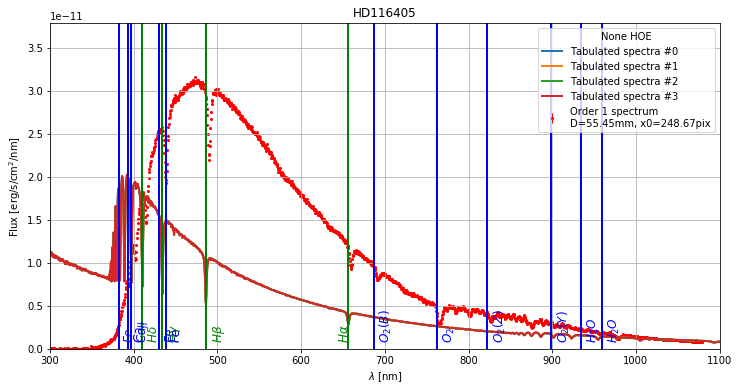

In [192]:
idx=7
fullfilename=os.path.join(output_directory,onlyfiles[idx])
s = Spectrum()
s.load_spectrum(fullfilename)
s.plot_spectrum(xlim=None,force_lines=True)